In [1]:
import os

start_path = os.getcwd()
start_path

'f:\\SF-DS-practice\\OOP'

In [2]:
os.chdir('..')
os.getcwd()

'f:\\SF-DS-practice'

In [3]:
os.chdir(start_path)
os.getcwd()

'f:\\SF-DS-practice\\OOP'

In [4]:
os.listdir()

['archive',
 'helpers',
 'oop_python.ipynb',
 'oop_with_files.ipynb',
 'status_tracking.ipynb']

In [5]:
print(start_path)
print(os.path.join(start_path, 'helpers')) # concatenates paths

f:\SF-DS-practice\OOP
f:\SF-DS-practice\OOP\helpers


# 7.3

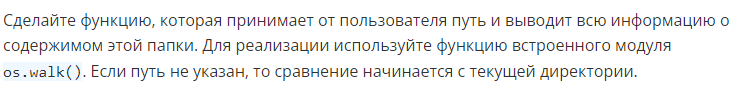

In [13]:
def get_path_info(path=os.getcwd()):
    for root, dir, file in os.walk(path):
        print('Root: ', root, '\n'
              'Directories: ', dir, '\n',
              'Files: ', file, '\n===', sep='')
get_path_info()

Root: f:\SF-DS-practice\OOP
Directories: ['archive', 'helpers']
Files: ['oop_python.ipynb', 'oop_with_files.ipynb', 'status_tracking.ipynb']
===
Root: f:\SF-DS-practice\OOP\archive
Directories: []
Files: ['23-01-06.pkl']
===
Root: f:\SF-DS-practice\OOP\helpers
Directories: ['__pycache__']
Files: ['client.py', 'data_frame.py', 'dumper.py', '__init__.py']
===
Root: f:\SF-DS-practice\OOP\helpers\__pycache__
Directories: []
Files: ['client.cpython-310.pyc', 'data_frame.cpython-310.pyc', 'dumper.cpython-310.pyc']
===


In [8]:
def walk_desc(path=None):
    start_path = path if path is not None else os.getcwd()

    for root, dirs, files in os.walk(start_path):
        print("Текущая директория", root)
        print("---")

        if dirs:
            print("Список папок", dirs)
        else:
            print("Папок нет")
        print("---")

        if files:
            print("Список файлов", files)
        else:
            print("Файлов нет")
        print("---")

        if files and dirs:
            print("Все пути:")
        for f in files:
            print("Файл ", os.path.join(root, f))
        for d in dirs:
            print("Папка ", os.path.join(root, d))
        print("===")

walk_desc()

Текущая директория f:\SF-DS-practice\OOP
---
Список папок ['archive', 'helpers']
---
Список файлов ['oop_python.ipynb', 'oop_with_files.ipynb', 'status_tracking.ipynb']
---
Все пути:
Файл  f:\SF-DS-practice\OOP\oop_python.ipynb
Файл  f:\SF-DS-practice\OOP\oop_with_files.ipynb
Файл  f:\SF-DS-practice\OOP\status_tracking.ipynb
Папка  f:\SF-DS-practice\OOP\archive
Папка  f:\SF-DS-practice\OOP\helpers
===
Текущая директория f:\SF-DS-practice\OOP\archive
---
Папок нет
---
Список файлов ['23-01-06.pkl']
---
Файл  f:\SF-DS-practice\OOP\archive\23-01-06.pkl
===
Текущая директория f:\SF-DS-practice\OOP\helpers
---
Список папок ['__pycache__']
---
Список файлов ['client.py', 'data_frame.py', 'dumper.py', '__init__.py']
---
Все пути:
Файл  f:\SF-DS-practice\OOP\helpers\client.py
Файл  f:\SF-DS-practice\OOP\helpers\data_frame.py
Файл  f:\SF-DS-practice\OOP\helpers\dumper.py
Файл  f:\SF-DS-practice\OOP\helpers\__init__.py
Папка  f:\SF-DS-practice\OOP\helpers\__pycache__
===
Текущая директория f:\SF

# How to open files

In [ ]:
f = open('path/to/file', 'filemode', encoding='utf8')

filemodes:
- r - read(default)
- w - write/create
- x - create and write. If exists -> exception
- a - open to write into end of file
- t - open in text view(defaul)
- b - binary

In [1]:
f = open('test.txt', 'w')
f.write('This is a test string\n')
f.write('This is a new string\n')
f.close()

In [2]:
f = open('test.txt', 'r')
f.read(10)

'This is a '

In [3]:
f.read()

'test string\nThis is a new string\n'

In [4]:
f.close()

In [5]:
f = open('test.txt', 'a')
sequence = ['other string\n', '123\n', 'test test\n']
f.writelines(sequence)
f.close()

In [6]:
f = open('test.txt', 'r')
print(f.readlines())
f.close()

['This is a test string\n', 'This is a new string\n', 'other string\n', '123\n', 'test test\n']


In [7]:
f = open('test.txt', 'r')
print(f.readline())
print(f.read(4))
print(f.readline())

This is a test string

This
 is a new string



# File as iterator

In [10]:
f = open('test.txt')
for line in f:
    print(line, end='')
f.close()

This is a test string
This is a new string
other string
123
test test


# With / as

In [11]:
with open('test.txt', 'rb') as f:
    a = f.read(10)
    b = f.read(23)

print(a)
print(b)
print(f.read(3))

b'This is a '
b'test string\r\nThis is a '


ValueError: read of closed file

# 7.4

In [12]:
with open('input.txt', 'w') as f_input:
    seq = ['this is\n', 'an input\n', 'file\n']
    f_input.writelines(seq)
    
with open('output.txt', 'w') as f_output:
    with open('input.txt', 'r') as f_input:
        for lines in f_input:
            f_output.write(lines)

# 7.5

In [51]:
import random
with open('numbers.txt', 'w') as numbers:
    for i in range(33):
        numbers.write(str(random.randint(0, 100))+'\n')
with open('numbers.txt') as numb:
    list_nums = numb.readlines()
for i in range(len(list_nums)):
    list_nums[i] = int(list_nums[i].replace('\n', ''))
min_num = min(list_nums)
max_num = max(list_nums)
print(min_num, max_num, min_num+max_num)

4 90 94


# 7.6

In [61]:
with open('names.txt', 'r', encoding='utf8') as names:
    names_dict = {}
    for name in names:
        names_dict[name[:-3]] = name[-2]
bad_students = []
for key, value in names_dict.items():
    if int(value) < 3:
        bad_students.append(key)
bad_students


['Дмитриев Н.', 'Котов Д.', 'Бирюкова Н.', 'Лемонов Ю.']

# 7.7

In [85]:
with open('reverse.txt', 'r') as reverse_read:
    reading = reverse_read.readlines()
    with open('reverse.txt', 'w') as reverse_write:
        for line in reading:
            reverse_write.write(line[::-1].replace('\n', '')+'\n')